# Overview of human STR panel
Panel is based on the one provided by [GangSTR](https://github.com/gymreklab/gangstr), with the addition of mononucleotide repeats.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("poster")

%matplotlib inline

In [3]:
cols = ["chr", "start", "end", "period", "motif"]
df_repeats = pd.read_csv("../../data/hg38_ver13_0boe_mononucleotides.bed", sep="\t", names=cols).assign(
    region_len = lambda x: x["end"] - x["start"]
)
df_repeats

,chr,start,end,period,motif,region_len
0,chr1,14069,14081,4,CCTC,12
1,chr1,16619,16631,3,GCT,12
2,chr1,22811,22821,5,AGGAA,10
3,chr1,26453,26465,2,GT,12
4,chr1,28588,28603,1,T,15
...,...,...,...,...,...,...
1733641,chrY,57188867,57188878,1,A,11
1733642,chrY,57200837,57200851,1,A,14
1733643,chrY,57200999,57201019,1,A,20
1733644,chrY,57202380,57202403,1,A,23


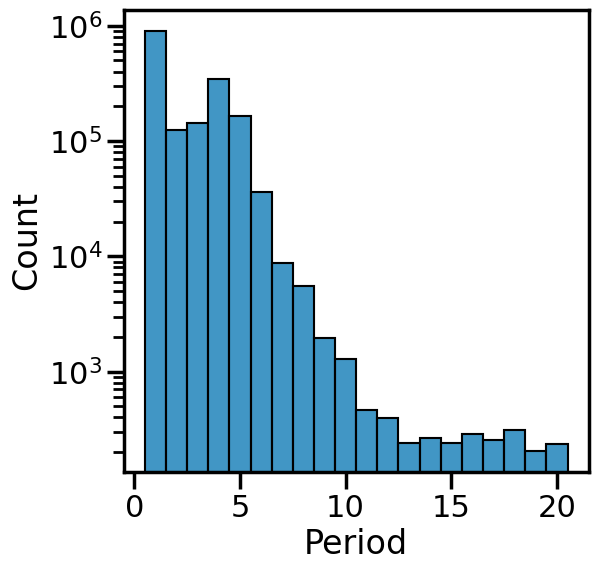

In [4]:
# df_repeats.value_counts("period")
fig = plt.figure(figsize=(6, 6))

ax = sns.histplot(
    df_repeats["period"],
    discrete=True,
    color=sns.color_palette("colorblind")[0]
)

_ = ax.set(
    xlabel="Period",
    yscale="log"
)

In [5]:
df_repeats.query("period > 6").shape

(20481, 6)

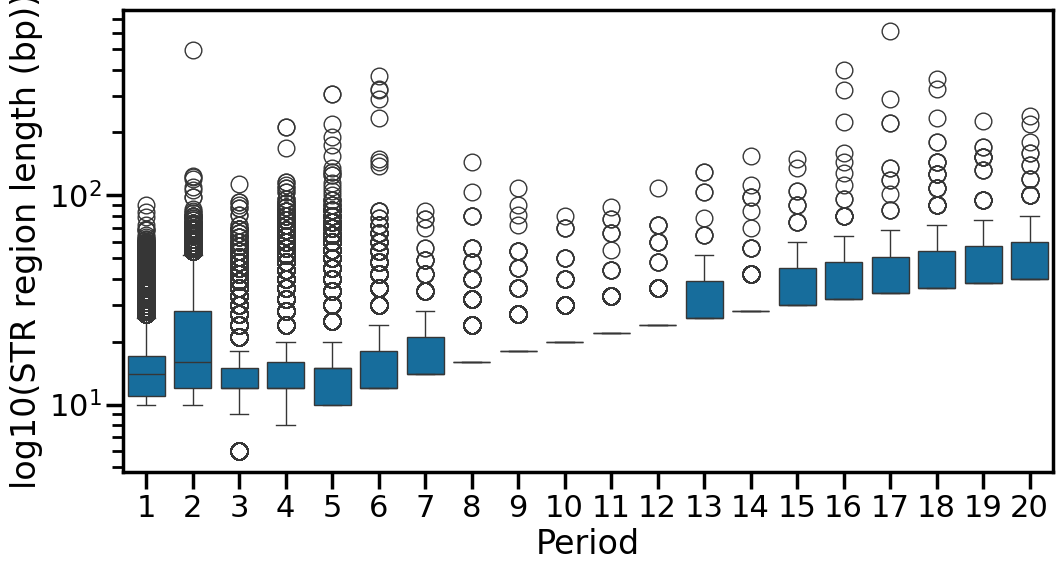

In [6]:
fig = plt.figure(figsize=(12, 6))

ax = sns.boxplot(
    df_repeats,
    x = "period",
    y="region_len",
    color=sns.color_palette("colorblind")[0]
)

_ = ax.set(
    xlabel="Period",
    ylabel="log10(STR region length (bp))",
    yscale="log"
)

In [9]:
print(df_repeats.query("region_len <= 30").shape[0] / df_repeats.shape[0])
print(df_repeats.query("region_len > 30").shape[0] / df_repeats.shape[0])

0.9661787931330849
0.03382120686691516
